# Preprocessing
### Imports

New Python versions sometimes require some extra installations found in the code below

In [2]:
!pip install standard-sunau standard-aifc


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
#Set Dir 
import sys, os
sys.path.append(os.path.abspath('..'))

# Torch
import torch
from torch.utils.data import DataLoader, Dataset
# Utils
import numpy as np
from numpy import ndarray
import logging
# Base Scripts
from Libraries.Utils import *
from Conf import conf


### Config

In [8]:
remote_kernel: bool = False
training_data_name: str = "training_full_mel"
n_samples: int = 10000
logging_level: int = LIGHT_DEBUG
logging.basicConfig(level=logging_level, format='%(asctime)s - %(levelname)s - %(message)s')
logger: logging.Logger = logging.getLogger(__name__)
filenames = get_filenames_from_folder(path_to_remote_path(conf["paths"].data_path, remote_kernel), "wav")

2025-06-08 10:01:25,110 - LIGHT_DEBUG - Got filenames ['Am Bach 2024.wav', 'Cutting Mixes mix.wav', 'DA2407_ADO.wav'] from ../Data


### Processing

In [9]:
data: list = []
remaining_samples: int = n_samples
for i in range(len(filenames)):
    file = load_audio_file(os.path.join(path_to_remote_path(conf["paths"].data_path, remote_kernel), filenames[i]), conf["audio"].sample_rate, True)
    file = split_audiofile(file, 4.096, conf["audio"].sample_rate, conf["audio"].overlap)
    file = audio_splits_to_mel_spectrograms(file, 1023, 256, 32000, True, 30, 96)
    data.append(file)
    if file.shape[0] < remaining_samples:
        remaining_samples -= file.shape[0]
    else: break

data: ndarray = np.vstack(data)
data = normalize_filewise(data, -1, 1)
#data = dimension_for_VAE(data)[:n_samples]
logger.info(f"Processed data of shape: {data.shape}")

2025-06-08 10:01:49,536 - LIGHT_DEBUG - Loaded audio form ../Data\Am Bach 2024.wav of dimensions: (241901628,), sr: 32000
2025-06-08 10:01:50,079 - LIGHT_DEBUG - Split audio to: (2441, 131072)
2025-06-08 10:01:50,156 - LIGHT_DEBUG - Started Mel-Spec on splits


2025-06-08 10:02:29,000 - LIGHT_DEBUG - Processed Splits: 2430

2025-06-08 10:02:29,436 - LIGHT_DEBUG - Created Mel-spectrograms of splits: (2441, 96, 512)


2025-06-08 10:02:29,000 - LIGHT_DEBUG - Processed Splits: 2440


2025-06-08 10:02:42,224 - LIGHT_DEBUG - Loaded audio form ../Data\Cutting Mixes mix.wav of dimensions: (192650642,), sr: 32000
2025-06-08 10:02:42,569 - LIGHT_DEBUG - Split audio to: (1944, 131072)
2025-06-08 10:02:42,641 - LIGHT_DEBUG - Started Mel-Spec on splits


2025-06-08 10:03:16,000 - LIGHT_DEBUG - Processed Splits: 1940

2025-06-08 10:03:17,087 - LIGHT_DEBUG - Created Mel-spectrograms of splits: (1944, 96, 512)


2025-06-08 10:03:36,114 - LIGHT_DEBUG - Loaded audio form ../Data\DA2407_ADO.wav of dimensions: (246022144,), sr: 32000
2025-06-08 10:03:36,456 - LIGHT_DEBUG - Split audio to: (2482, 131072)
2025-06-08 10:03:36,509 - LIGHT_DEBUG - Started Mel-Spec on splits


2025-06-08 10:04:12,000 - LIGHT_DEBUG - Processed Splits: 2480


2025-06-08 10:04:12,504 - LIGHT_DEBUG - Created Mel-spectrograms of splits: (2482, 96, 512)
2025-06-08 10:04:13,871 - LIGHT_DEBUG - Normalized to range: [-1,1]
2025-06-08 10:04:13,947 - INFO - Processed data of shape: (6867, 96, 512)


### Saving

In [10]:
save_training_data(data, f"{path_to_remote_path(conf["paths"].data_path, remote_kernel)}/{training_data_name}.npy")

2025-06-08 10:05:10,026 - LIGHT_DEBUG - Saved ndarray to:../Data/training_full_mel.npy


### Test Blocks

In [7]:
print(np.min(data), np.max(data))

-1.0 1.0


In [4]:
file = load_audio_file(os.path.join(path_to_remote_path(conf["paths"].data_path, remote_kernel), filenames[0]), conf["audio"].sample_rate, True)
file = split_audiofile(file, 4.096, conf["audio"].sample_rate, conf["audio"].overlap)

2025-06-08 09:42:25,947 - LIGHT_DEBUG - Loaded audio form ../Data\Am Bach 2024.wav of dimensions: (241901628,), sr: 32000
2025-06-08 09:42:26,299 - LIGHT_DEBUG - Split audio to: (2441, 131072)


2025-06-08 09:44:05,763 - LIGHT_DEBUG - Started Mel-Spec
2025-06-08 09:44:05,820 - LIGHT_DEBUG - Created mel-spectrogram: (96, 512)
2025-06-08 09:44:05,822 - LIGHT_DEBUG - Normalized to range: [-1,1]
2025-06-08 09:44:05,835 - LIGHT_DEBUG - Started Mel-Spec
2025-06-08 09:44:05,851 - LIGHT_DEBUG - Created mel-spectrogram: (96, 512)
2025-06-08 09:44:05,853 - LIGHT_DEBUG - Normalized to range: [-1,1]


(96, 512)


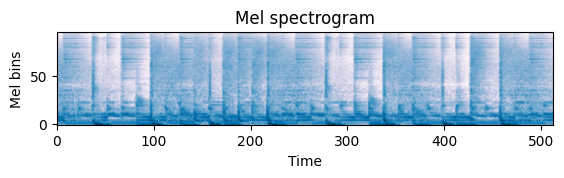

'\nspec = audio_to_mel_spectrogram(file[70], 2048, 256, 32000, True, min_freq=30, n_mels=128)\nspec = normalize(spec, -1, 1)\nplt.imshow(spec, cmap = "PuRd", origin="lower")\n'

In [6]:
print(normalize(audio_to_mel_spectrogram(file[70], 2047, 256, 32000, True, min_freq=30, n_mels=96)).shape)
plt.title("Mel spectrogram")
plt.xlabel("Time")
plt.xlim(0, 512)
plt.ylabel("Mel bins")
plt.imshow(normalize(audio_to_mel_spectrogram(file[70], 1023, 256, 32000, True, min_freq=30, n_mels=96)), origin="lower", cmap="PuBu")
plt.show()
"""
spec = audio_to_mel_spectrogram(file[70], 2048, 256, 32000, True, min_freq=30, n_mels=128)
spec = normalize(spec, -1, 1)
plt.imshow(spec, cmap = "PuRd", origin="lower")
"""
#save_audio_file(spectrogram_to_audio(spec, 480, 288, conf["audio"].sample_rate), "../Results/low_res.wav", sample_rate=conf["audio"].sample_rate)